# CREDIT CARD FRAUD DETECTION

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

## Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix,cohen_kappa_score,recall_score,precision_score
from sklearn.metrics import fbeta_score,roc_auc_score,make_scorer,roc_curve,balanced_accuracy_score,matthews_corrcoef
from sklearn.model_selection import KFold
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
labels=['Normal','fraud']
class_labels={0:"Normal Transaction", 
              1:"Fraud Transaction"}
print('Class 0 :',class_labels[0])
print('Class 1 :',class_labels[1])

Class 0 : Normal Transaction
Class 1 : Fraud Transaction


In [6]:
print('Number of normal transactions : ',len(df[df['Class']==0]))
print('Number of fraudulent transactions : ',len(df[df['Class']==1]))

Number of normal transactions :  284315
Number of fraudulent transactions :  492


### Exploratory Data Analysis

In [7]:
# Missing Values
df.isnull().sum().values.any()

False

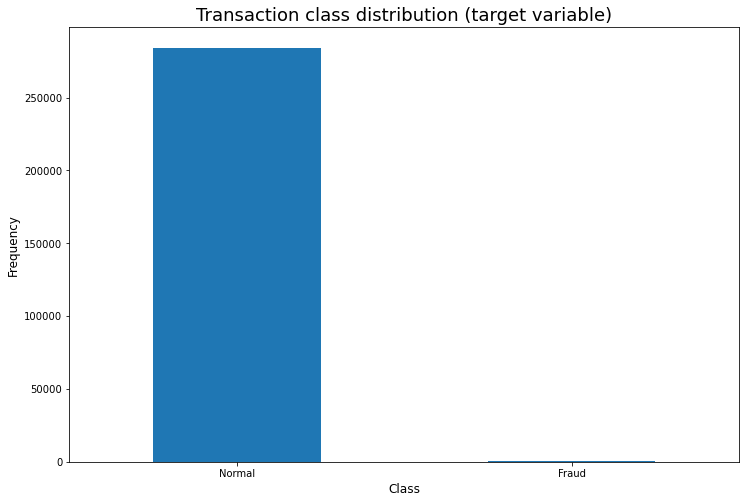

In [8]:
# Target variable class distribution
plt.figure(figsize=(12,8))
df['Class'].value_counts(sort=True).plot(kind='bar')
plt.xticks(range(2),['Normal','Fraud'],rotation=0)
plt.title('Transaction class distribution (target variable)',fontsize=18)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

In [9]:
print('Normal Transactions', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud Transactions', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal Transactions 99.83 % of the dataset
Fraud Transactions 0.17 % of the dataset


Our Dataset is highly Imbalanced and hence we need to use either Oversampling/Undersampling to Tackle the problem.

 Feature Technicalities:

PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).

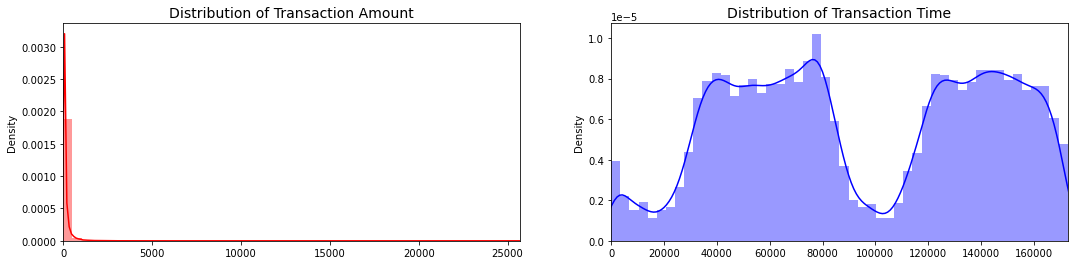

In [83]:
# Plotting distribution for Time and Amount.
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [11]:
# Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [12]:
print('Number of Normal transactions :',normal.shape[0])
print('Number of Fraud transactions :',fraud.shape[0])

Number of Normal transactions : 284315
Number of Fraud transactions : 492


In [13]:
# We need to analyze more amount of information from the transaction data
# How different are the amount of money used in different transaction classes.
print('Fraud Transaction Amount : \n\n',fraud.Amount.describe())

print('\n\nNormal Transaction Amount : \n\n',normal.Amount.describe())

Fraud Transaction Amount : 

 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Normal Transaction Amount : 

 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


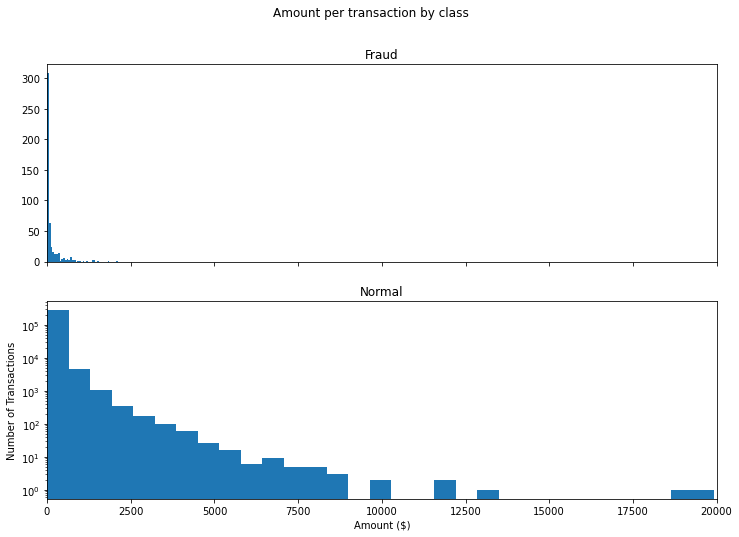

In [14]:
# Amount per transaction by class

f,(ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(12,8))
f.suptitle('Amount per transaction by class')
bins = 40
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

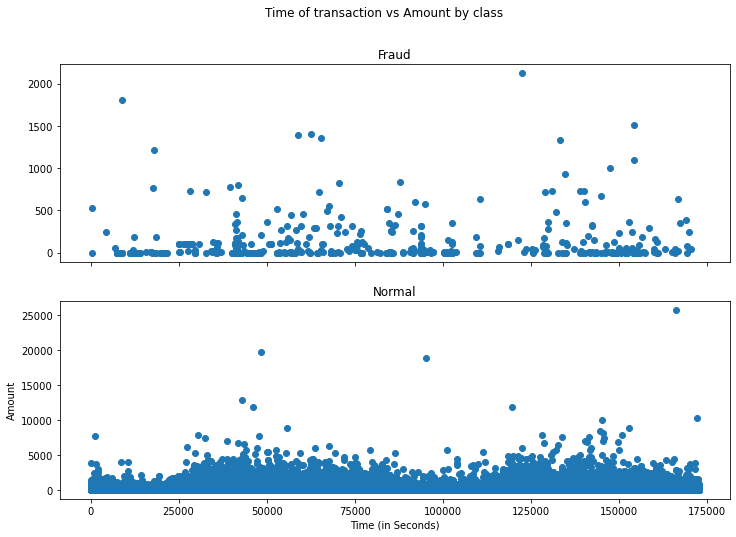

In [15]:
# visualizing Time vs Amount for different transaction class.
# to check whether fraudulent transactions occur more often during a certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(12,8))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Outlier detection and Treatment

In [16]:
X=df.drop('Class',axis=1)
Y=df.Class

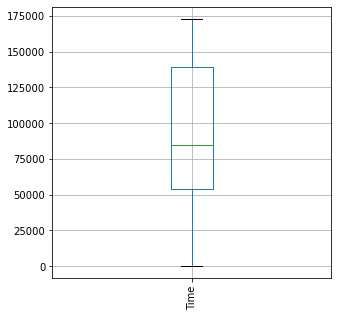

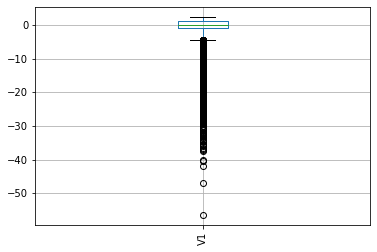

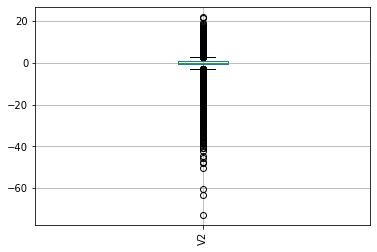

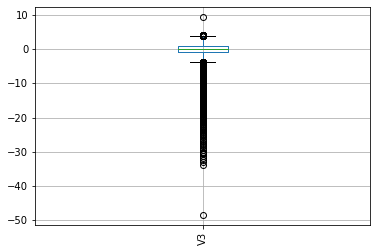

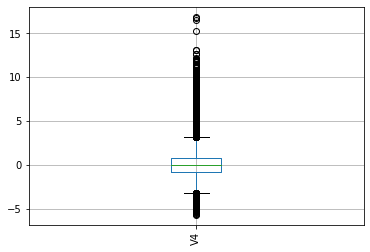

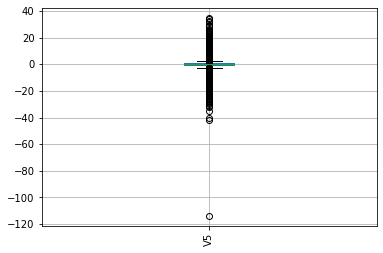

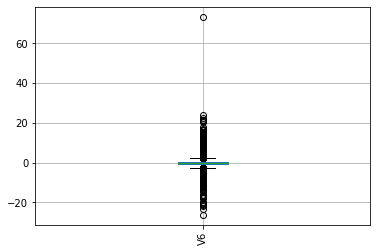

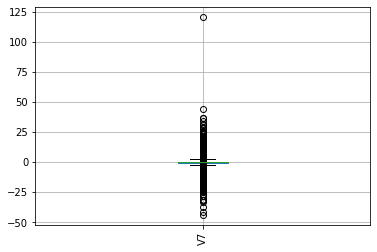

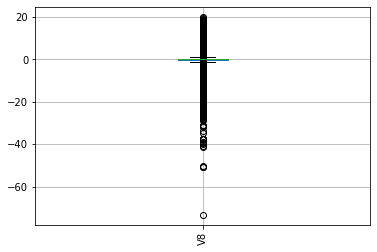

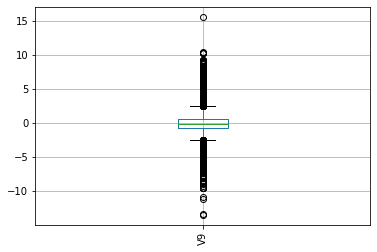

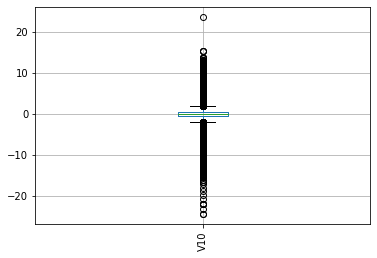

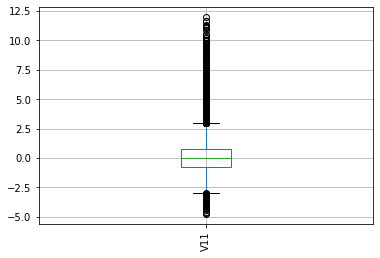

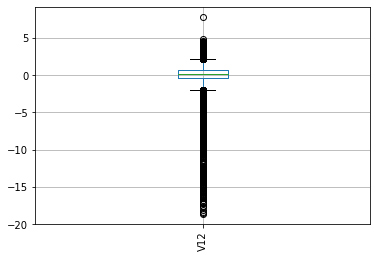

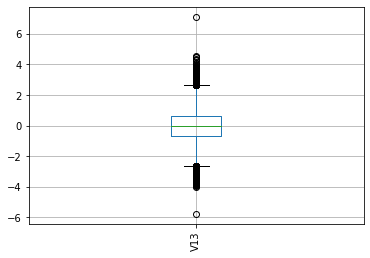

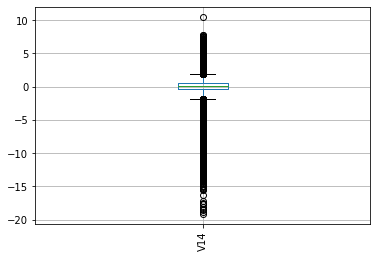

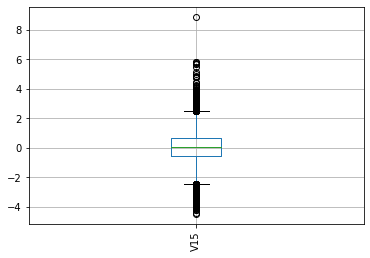

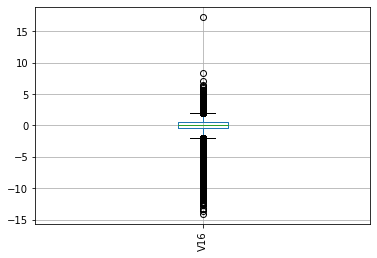

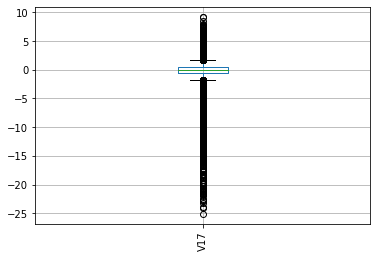

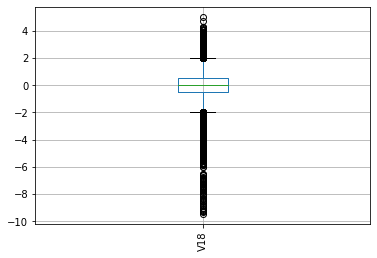

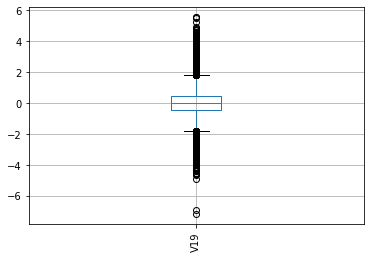

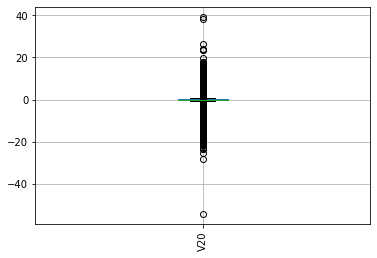

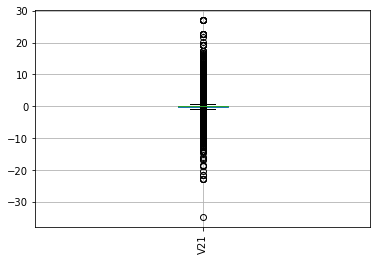

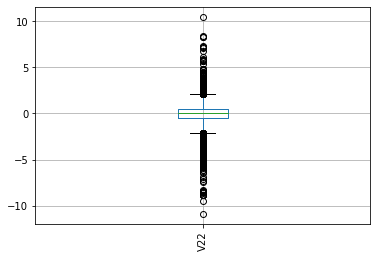

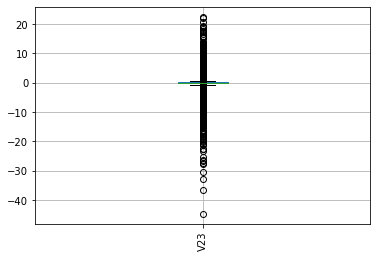

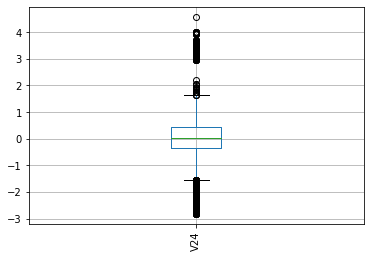

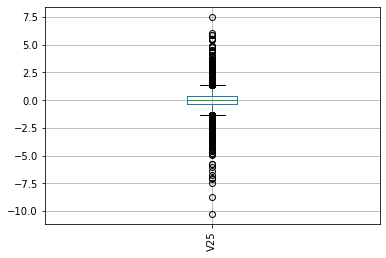

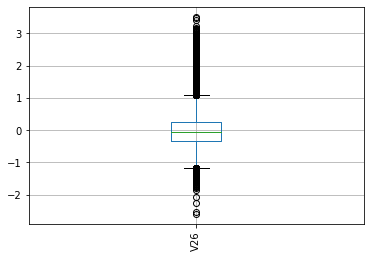

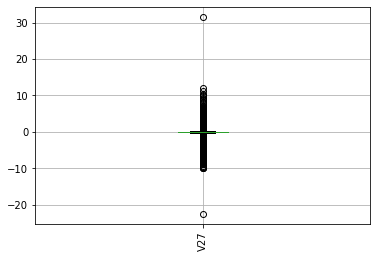

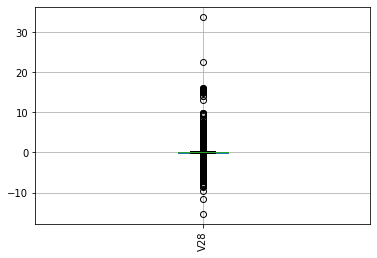

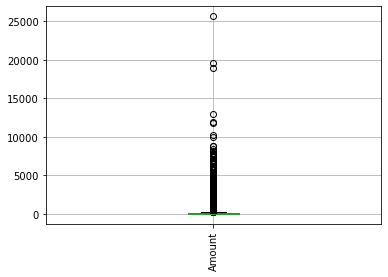

In [17]:
# Outlier Detection for normal transaction features.
plt.figure(figsize=(5,5))
plt.tight_layout()
col=X.columns
for i in col:
    X.boxplot(i)
    plt.xticks(rotation=90)
    plt.show()


In [18]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

features_scaled=rs.fit_transform(X)
features_scaled=pd.DataFrame(features_scaled,columns=X.columns)

In [19]:
df_scaled=pd.concat([features_scaled,Y],axis=1)

In [20]:
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


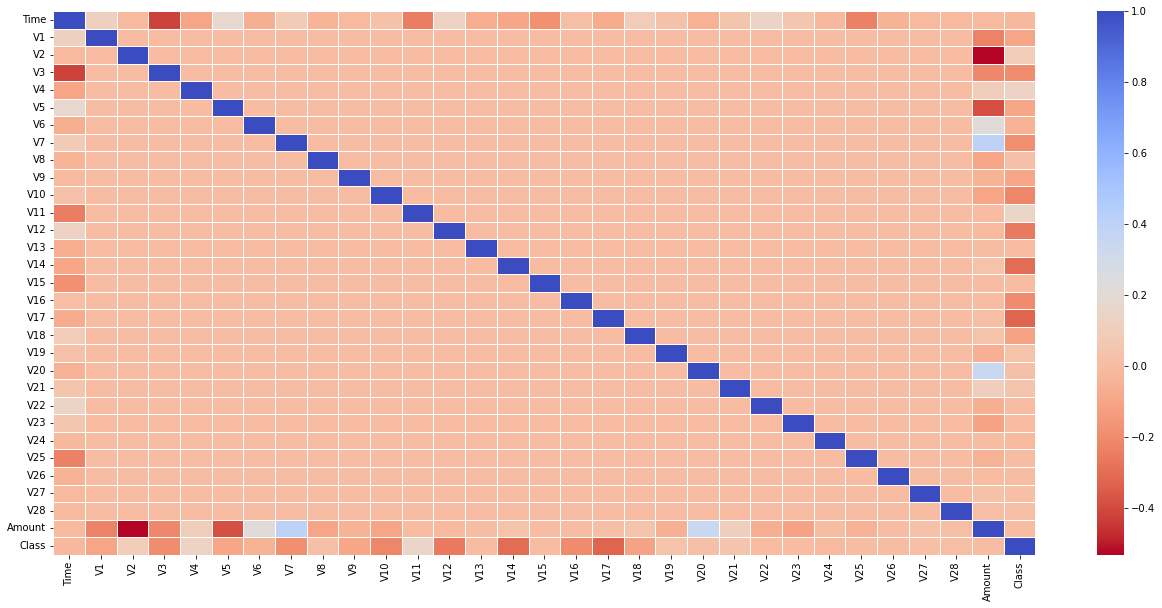

In [21]:
# Correlation Heatmap

plt.figure(figsize=(22,10))
#plot heat map
sns.heatmap(df_scaled.corr(),cmap="coolwarm_r",linewidth=1)
plt.show()

In [22]:
df_vis=df_scaled.copy()
df_vis.Class=df_vis.Class.astype('object')

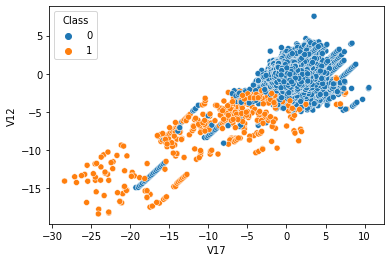

In [23]:
# negetively correlated features : v17,v14,v12
sns.scatterplot(x='V17',y='V12',data=df_vis,hue='Class')
plt.show()

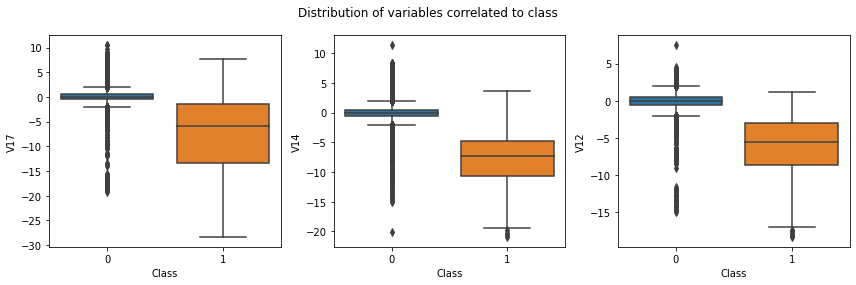

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

fig.suptitle('Distribution of variables correlated to class')

sns.boxplot(ax=axes[0], data=df_vis, x='Class', y='V17')
sns.boxplot(ax=axes[1], data=df_vis, x='Class', y='V14')
sns.boxplot(ax=axes[2], data=df_vis, x='Class', y='V12')
plt.tight_layout()
plt.show()

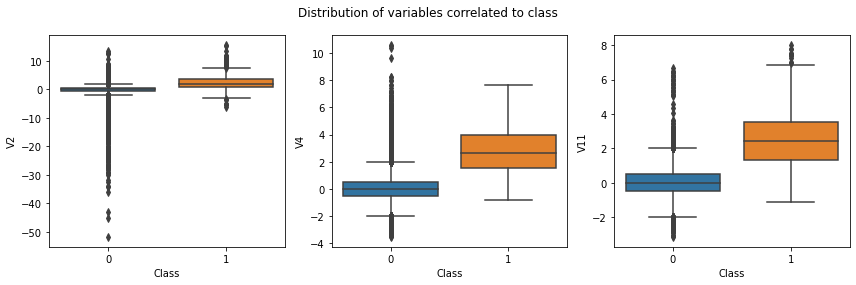

In [25]:
# V2 ,V4,V11 are positively correlated to class
fig, axes = plt.subplots(1, 3, figsize=(12,4))

fig.suptitle('Distribution of variables correlated to class')

sns.boxplot(ax=axes[0], data=df_vis, x='Class', y='V2')
sns.boxplot(ax=axes[1], data=df_vis, x='Class', y='V4')
sns.boxplot(ax=axes[2], data=df_vis, x='Class', y='V11')
plt.tight_layout()
plt.show()

### Treating Outliers for normal transaction records

In [26]:
df_0=df_scaled.loc[df_scaled['Class']==0]
df_1=df_scaled.loc[df_scaled['Class']==1]

In [27]:
#removing outliers for negatively correlated variables for normal transactions
from scipy import stats
df_0=df_0.loc[np.abs(stats.zscore(df_0['V17']))<3]
df_0=df_0.loc[np.abs(stats.zscore(df_0['V14']))<3]
df_0=df_0.loc[np.abs(stats.zscore(df_0['V12']))<3]


In [28]:
df_0=df_0.loc[np.abs(stats.zscore(df_0['V2']))<3]
df_0=df_0.loc[np.abs(stats.zscore(df_0['V4']))<3]
df_0=df_0.loc[np.abs(stats.zscore(df_0['V11']))<3]

In [29]:
len(df_0)

266628

In [30]:
print('Number of rows before removing outliers :',len(df[df['Class']==0]))
print('Number of rows after removing outliers :',len(df_0))


Number of rows before removing outliers : 284315
Number of rows after removing outliers : 266628


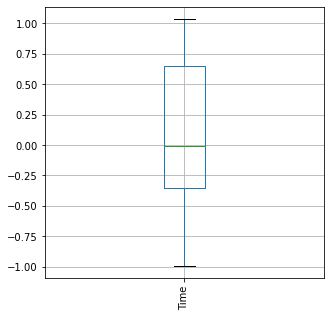

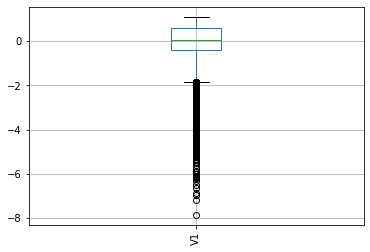

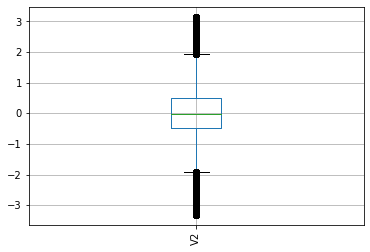

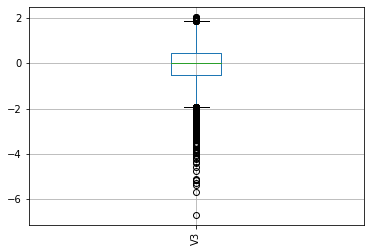

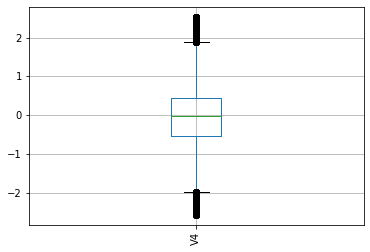

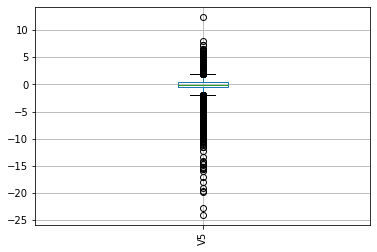

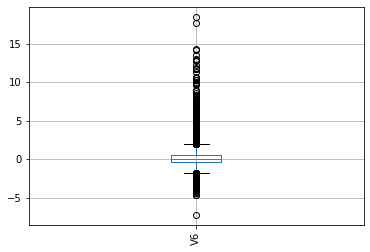

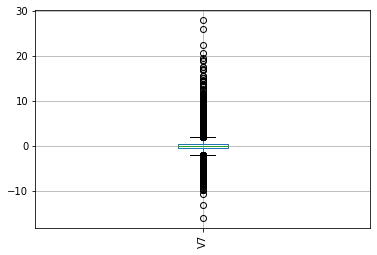

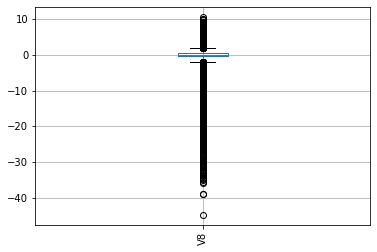

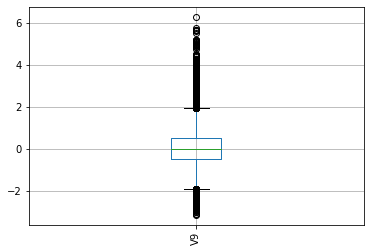

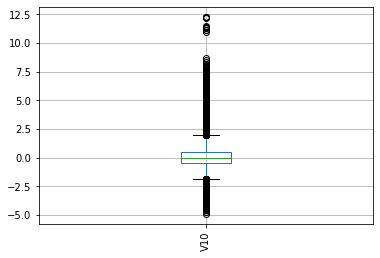

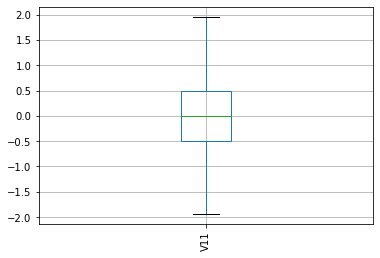

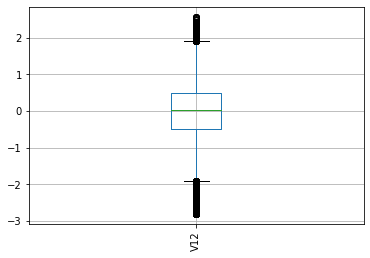

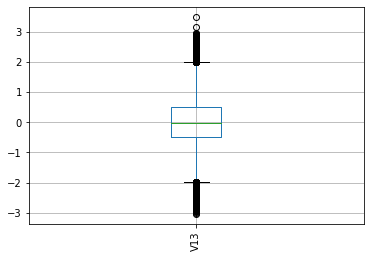

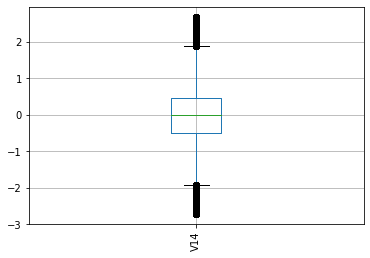

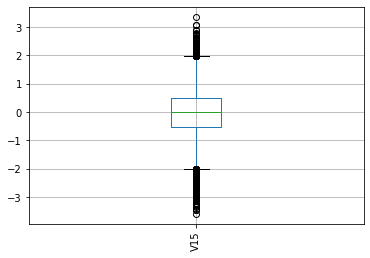

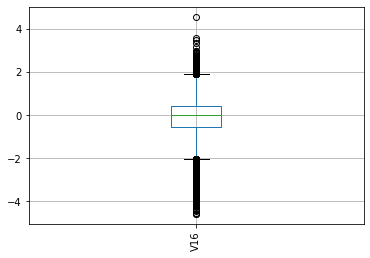

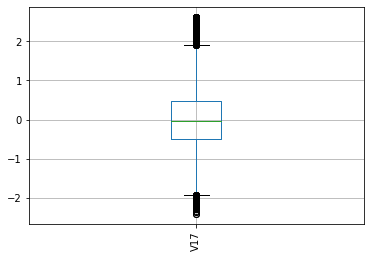

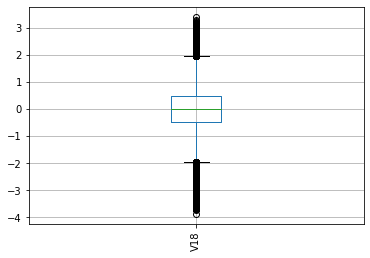

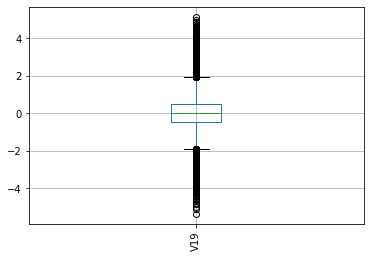

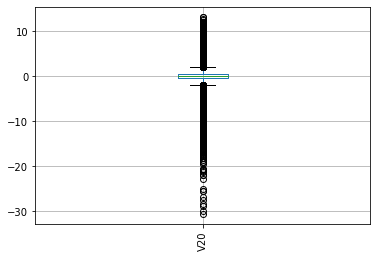

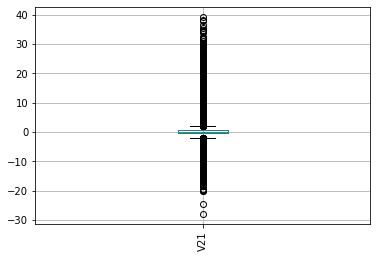

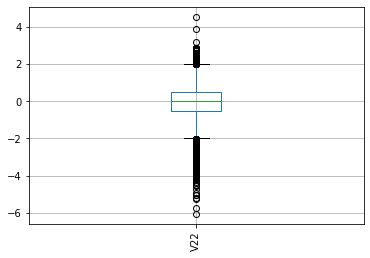

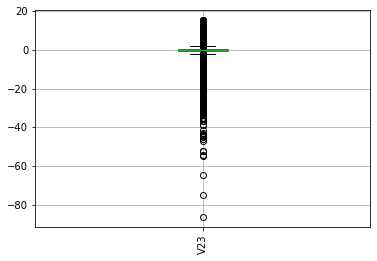

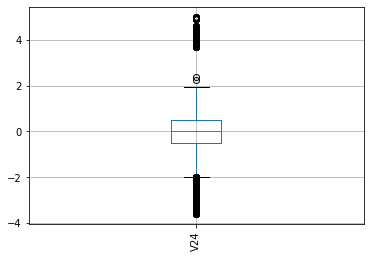

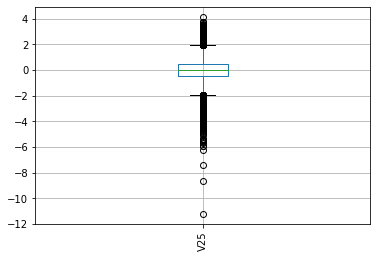

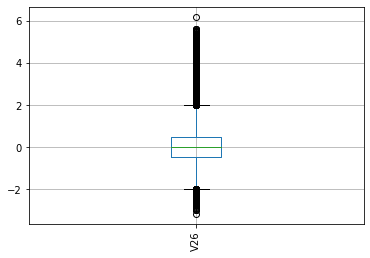

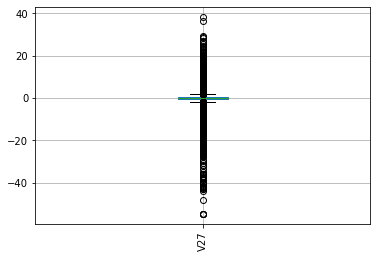

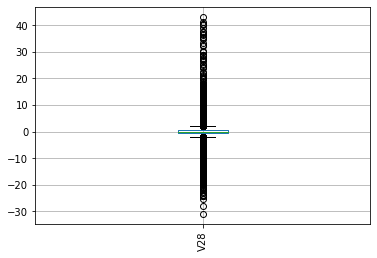

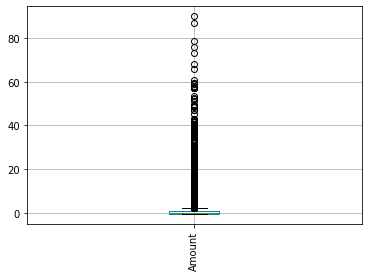

In [31]:
# Outlier Detection for normal transaction features.
plt.figure(figsize=(5,5))
plt.tight_layout()
col=df_0.drop('Class',axis=1).columns
for i in col:
    df_0.boxplot(i)
    plt.xticks(rotation=90)
    plt.show()


In [32]:
df_final=pd.concat([df_0,df_1])
df_final.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [33]:
df_final= df_final.sample(frac=1, random_state=10)

In [34]:
df_final.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79416,-0.313385,0.435777,-0.152362,0.255862,0.870828,-0.452639,0.005240,-0.088770,0.005647,0.274832,...,0.197663,0.185469,-0.543104,0.658662,0.967120,-0.481438,0.128645,0.120344,0.852232,0
185159,0.491653,0.826375,-0.383027,-1.721933,-0.367062,1.932706,3.013067,-0.422537,1.476152,0.744866,...,-0.422892,-0.577387,0.559971,0.688898,-0.109004,-0.041001,-0.018798,-0.201260,0.853909,0
185025,0.491065,-0.442054,-0.056367,0.389326,-1.971581,-0.512155,-0.080295,-0.400774,0.945060,-1.961287,...,-0.300257,-0.150653,-1.255018,-0.694677,1.138797,-0.064147,0.803460,0.045208,-0.167680,0


### Train Test Split

In [35]:
X=df_final.drop('Class',axis=1)
Y=df_final['Class']
print(X.shape,Y.shape)

(267120, 30) (267120,)


In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.17,random_state=10)
print('Training data length :',len(x_train))
print('Testing  data length : ',len(x_test))

Training data length : 221709
Testing  data length :  45411


In [37]:
print('Test dataset value counts %s' % Counter(y_test))

Test dataset value counts Counter({0: 45327, 1: 84})


## Model Devolopment

In [38]:
# generalized function to calculate the metrics values for train set
def get_test_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_test)
    print('Cohen Kappa Score : ',round(cohen_kappa_score(y_test,train_pred),3))

    # return the performace measures on train set
    return(classification_report(y_test, train_pred))

In [39]:
def get_confusion_matrix(model):
    
    y_pred=model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm2 = confusion_matrix(y_test, y_pred,normalize='true')
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    per=['{0:0.2%}'.format(value) for value in cm2.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,per)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize =(5, 5))
    sns.heatmap(cm,annot = labels,cbar=False,fmt='',linewidths=0.2,cmap='Blues_r')
    plt.title("Confusion matrix",fontsize=10)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [40]:
def get_class_accuracy(model) :
    
    b=y_test.copy()
    
    test_preds = model.predict(x_test)
    b.index = range(len(y_test))

    y_test_1 = b[b == 1]
    test_preds_1 = test_preds[y_test_1.index]

    y_test_0 = b[b == 0]
    test_preds_0 = test_preds[y_test_0.index]

    acc = accuracy_score(b, test_preds)
    acc_1 = accuracy_score(y_test_1, test_preds_1)
    acc_0 = accuracy_score(y_test_0, test_preds_0)

    print("Total Accuracy: %.1f%%" %(acc*100))
    print("Fraud Accuracy: %.1f%%" %(acc_1*100))
    print("Non-Fraud Accuracy: %.1f%%" %(acc_0*100))
    


In [41]:
def get_roc_curve(model):
    y_pred=model.predict(x_test)
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred,pos_label=1)    
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [42]:
sc=pd.DataFrame()

In [43]:
def get_score_card(model,model_name_func):
    
    y_pred=model.predict(x_test)
    sc.index=['Accuracy Score','Recall Score','Precision Score','f1 Score','cohen kappa score','fbeta score','balanced_accuracy_score','matthews_corrcoef']
    score=[]
    score.append(accuracy_score(y_test,y_pred))
    score.append(recall_score(y_test,y_pred,pos_label=1))
    score.append(precision_score(y_test,y_pred,pos_label=1))
    score.append(f1_score(y_test,y_pred,pos_label=1))
    score.append(cohen_kappa_score(y_test,y_pred))
    score.append(fbeta_score(y_test,y_pred,beta=2,pos_label=1))
    score.append(balanced_accuracy_score(y_test,y_pred))
    score.append(matthews_corrcoef(y_test, y_pred))
    sc[model_name_func]=score
    return sc

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
import time

In [45]:
precision=make_scorer(precision_score,pos_label=1)
recall=make_scorer(recall_score,pos_label=1)
accuracy=make_scorer(accuracy_score)
f1score=make_scorer(f1_score,pos_label=1)
balanced_accuracy=make_scorer(balanced_accuracy_score)
score_dict={'accuracy':accuracy,
            'recall':recall,
            'f1':f1score,
            'precision':precision,
            'balanced_accuracy':balanced_accuracy}

In [84]:
def get_cross_val_score(model,x,y):
    # define evaluation procedure

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    #scores=[accuracy,recall,precision,f1score]
    scores=cross_validate(model,x,y,scoring=score_dict,cv=cv,n_jobs=3)
    print('Mean Accuracy : ',np.mean(scores['test_accuracy']))
    print('Mean Recall : ',np.mean(scores['test_recall']))
    print('Mean precision : ',np.mean(scores['test_precision']))
    print('Mean f1 Score :',np.mean(scores['test_f1']))
    print('Mean balanced accuracy Score :',np.mean(scores['test_balanced_accuracy'])  )

# Model Devolopment

### 1) Logistic Regression

In [47]:
LR=LogisticRegression(random_state=10,max_iter=1000)
print('Model Evaluation metrics : \n\n :')
# fit the model and print scoring metrics using cross validation
get_cross_val_score(LR,x_train,y_train)


Model Evaluation metrics : 

 :
Mean Accuracy :  0.9997038159629663
Mean Recall :  0.8480392156862745
Mean precision :  0.9894251031616533
Mean f1 Score : 0.9131654788143284
Mean balanced accuracy Score : 0.9240113235003944


In [67]:
lr_model=LR.fit(x_train,y_train)

### 2) Random Forest

In [48]:
RFC = RandomForestClassifier(n_estimators = 10, random_state = 10)
print('Model Evaluation metrics : \n\n :')
#  print scoring metrics using cross validation
get_cross_val_score(RFC,x_train,y_train)

Model Evaluation metrics : 

 :
Mean Accuracy :  0.9997459131865042
Mean Recall :  0.863562091503268
Mean precision :  0.9980676328502417
Mean f1 Score : 0.9258220512024327
Mean balanced accuracy Score : 0.931779539507499


In [49]:
## fitting the model on training data
rf_model=RFC.fit(x_train,y_train)
# Classification report
print(get_test_report(rf_model))

Cohen Kappa Score :  0.943
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45327
           1       1.00      0.89      0.94        84

    accuracy                           1.00     45411
   macro avg       1.00      0.95      0.97     45411
weighted avg       1.00      1.00      1.00     45411



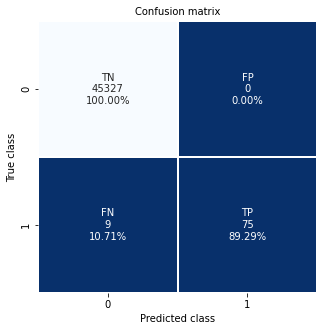

In [50]:
get_confusion_matrix(rf_model)

## Balancing the Dataset

In [68]:
from imblearn.over_sampling import ADASYN,RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

In [52]:
len(x_train)

221709

In [53]:
y_train.value_counts()

0    221301
1       408
Name: Class, dtype: int64

In [54]:
resample=SMOTE(sampling_strategy=0.90,random_state=10)
x_res1,y_res1=resample.fit_resample(x_train,y_train)

In [55]:
print('Training dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res1))

Training dataset shape Counter({0: 221301, 1: 408})
Resampled dataset shape Counter({0: 221301, 1: 199170})


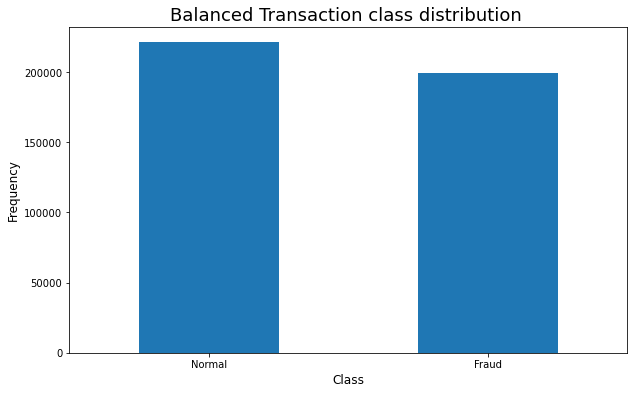

In [56]:
#visualizing Balanced dataset

plt.figure(figsize=(10,6))
y_res1.value_counts(sort=True).plot(kind='bar')
plt.xticks(range(2),['Normal','Fraud'],rotation=0)
plt.title('Balanced Transaction class distribution ',fontsize=18)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

In [70]:
weights = {0:150.0, 1:1.0}
RF3=RandomForestClassifier(random_state = 10,n_estimators=16,class_weight=weights,max_depth=20)
get_cross_val_score(RF3,x_res1,y_res1)

Mean Accuracy :  0.9677972242239457
Mean Recall :  0.9321517631504075
Mean precision :  0.9998548285310243
Mean f1 Score : 0.9648007882573268
Mean balanced accuracy Score : 0.9660148786877338


### Testing the model on unseen test data

In [71]:
final_model=RF3.fit(x_res1,y_res1)

In [72]:
print(get_test_report(final_model))

Cohen Kappa Score :  0.945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45327
           1       0.97      0.92      0.94        84

    accuracy                           1.00     45411
   macro avg       0.99      0.96      0.97     45411
weighted avg       1.00      1.00      1.00     45411



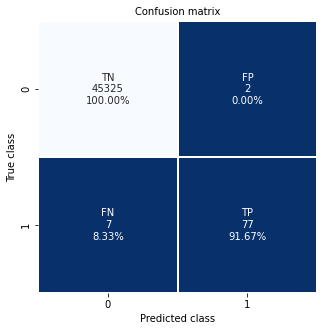

In [73]:
get_confusion_matrix(final_model)

In [74]:
get_class_accuracy(final_model)

Total Accuracy: 100.0%
Fraud Accuracy: 91.7%
Non-Fraud Accuracy: 100.0%


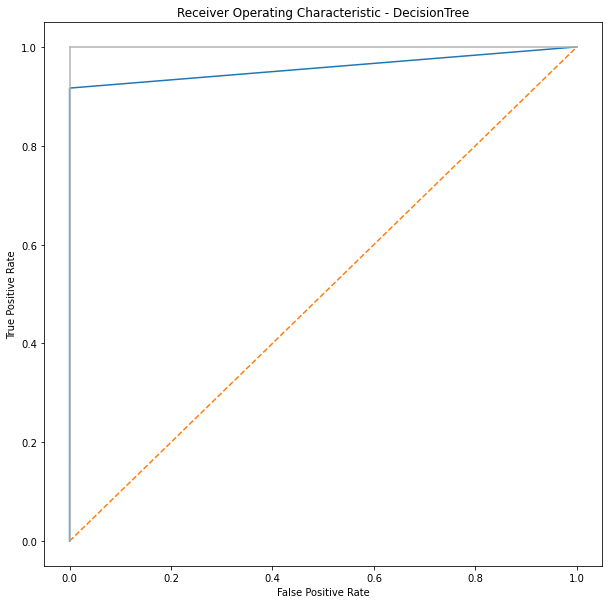

In [75]:
get_roc_curve(final_model)

In [76]:
get_score_card(rf_model,'Random Forest Model')
get_score_card(lr_model,'Logistic Regression Model')
get_score_card(final_model,'Random Forest Model Balanced')

,Random Forest Model,Logistic Regression Model,Random Forest Model Balanced
Accuracy Score,0.999802,0.999736,0.999802
Recall Score,0.892857,0.869048,0.916667
Precision Score,1.000000,0.986486,0.974684
f1 Score,0.943396,0.924051,0.944785
cohen kappa score,0.943297,0.923919,0.944686
fbeta score,0.912409,0.890244,0.927711
balanced_accuracy_score,0.946429,0.934513,0.958311
matthews_corrcoef,0.944817,0.925781,0.945132


Conclusion:

It is feasible to strike a balance between false negatives and false positives using a class weight hyper parameter. The optimal setting of this hyperparameter depends not only on the cost of false negatives and the cost of false positives, but also on the class imbalance. 


The Random forest trained on balanced dataset displays a good balance between false negative and false positive
Our Final model predicts fraud and normal transactions with an accuracy of 91.7% and 100% respectively.

Total accuracy is near 100%